In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mafuangimemkamon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mafuangimemkamon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mafuangimemkamon/nltk_data...


True

In [9]:
df = pd.read_csv('processed_data/stat_courses.csv')
documents = df['cleaned_text'].values

In [31]:
# Preprocess the data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]  # Lemmatize and remove non-alphabetic tokens
    tokens = [token for token in tokens if token not in stop_words]  # Remove stop words
    return ' '.join(tokens)  # Join tokens back into a single string

# Preprocess each document
processed_docs = [preprocess(doc) for doc in documents]

# Convert documents to a matrix of token counts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(processed_docs)

# Train the LDA model
num_topics = 3
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42, max_iter=100)
lda_model.fit(X)
print(lda_model.perplexity(X))

# Display the topics
feature_names = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx + 1}: ", [feature_names[i] for i in topic.argsort()[-10:]])

3117.5903431599304
Topic 1:  ['page', 'student', 'new', 'course', 'public', 'reading', 'policy', 'class', 'http', 'health']
Topic 2:  ['analysis', 'problem', 'lecture', 'week', 'assignment', 'project', 'data', 'class', 'student', 'course']
Topic 3:  ['reading', 'history', 'university', 'press', 'state', 'american', 'law', 'pp', 'new', 'http']


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
# Step 3: Get topic distribution for each document
topic_distribution = lda_model.transform(X)

# Step 4: Perform PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
topic_distribution_2d = pca.fit_transform(topic_distribution)

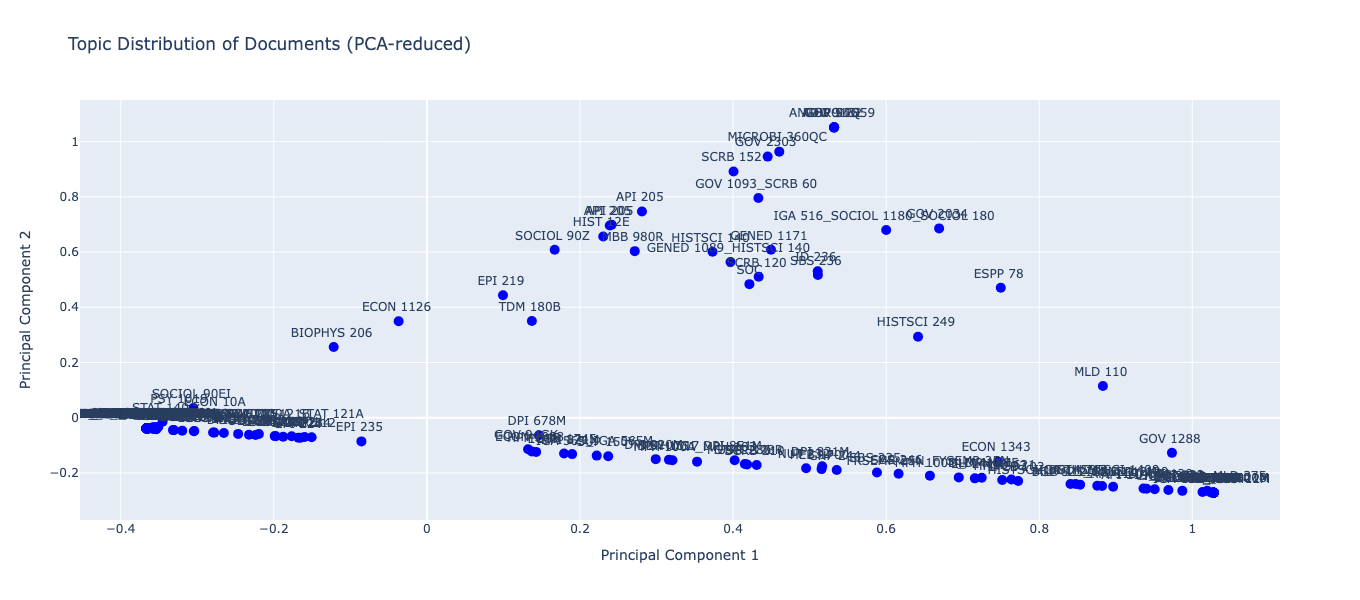

In [33]:
import plotly.graph_objects as go

# Step 5: Create interactive scatter plot using Plotly
fig = go.Figure()

# Add scatter plot
fig.add_trace(go.Scatter(
    x=topic_distribution_2d[:, 0], 
    y=topic_distribution_2d[:, 1],
    mode='markers+text',
    text=df['filename'].str.split('-').str[0],
    textposition='top center',
    marker=dict(size=10, color='blue')
))

# Title and labels
fig.update_layout(
    title="Topic Distribution of Documents (PCA-reduced)",
    xaxis_title="Principal Component 1",
    yaxis_title="Principal Component 2",
    template="plotly",
    showlegend=False,
    width=1000,  # Width of the plot (in pixels)
    height=600   # Height of the plot (in pixels)
)

# Show plot
fig.show()
